In [1]:
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="AppleGothic ")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐

from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import pytesseract
import imutils

In [2]:
def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')

    plt.show()

def vid_info(path, codec, name, fps):
    cap = cv2.VideoCapture(path)
    print(cap)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

    #재생할 파일의 높이 얻기
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    #재생할 파일의 프레임 레이트 얻기
    # fps = cap.get(cv2.CAP_PROP_FPS)
    
    #codec
    fourcc = cv2.VideoWriter_fourcc(*codec)
    
    #filename
    filename = name+'.mp4'
    
    #out 
    out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
    
    print('cap {0}, width {1}, height {2}, fps {3}'.format(cap, width, height, fps))
    print('codec {0}', 'filename {1}'.format(fourcc, filename))
    
    return cap, width, height, fps, fourcc, filename, out


### dividing

In [3]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/basic.mp4')

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()
    
start_basic_list =[]

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    start_basic_list.append(frame)


In [10]:
test = start_basic_list[400].copy()

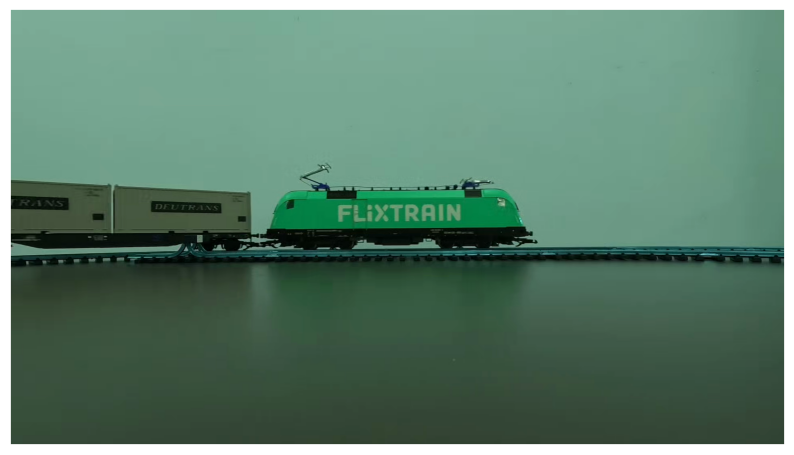

In [9]:
show(start_basic_list[400])

In [110]:
from rembg import remove

In [147]:
test = start_basic_list[0].copy()
img = test.copy()
img = cv2.resize(img, dsize =(860, 540))
roi  = img[0:540, 565:578].copy()

In [ ]:
test = start_basic_list[400].copy()
img = test.copy()
img = cv2.resize(img, dsize =(860, 540))
roi  = img[0:540, 565:578].copy()
# output = remove(img)
# show(output)
print(img.shape)

cv2.line(img, (320, 0), (320, 540), (0,0,255), 2)
cv2.line(img, (570, 0), (570, 540), (255,0,0), 2)
show(img)
### 잘라야하는 사이즈
# img = img[200:300, 280:580]
# # output = remove(img)
# # show(output)
# gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
# # ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# show(img)
# th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,2)

# show(th3)

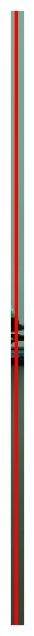

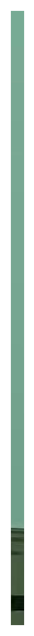

In [140]:
crop_img = img.copy()
### 빨간 것만 나와야해
red = crop_img[0:540, 565:578]
show(red)
test_red = test[0:540, 565:578].copy()
show(test_red)


In [148]:
hist,bins = np.histogram(roi.ravel(),256,[0,256])
hist

array([ 20,  10,  11,   2,   5,   2,   9,   8,  12,   8,  14,  20,  20,
        18,  20,  16,  19,  20,  11,  10,   8,  12,   5,   6,   4,  13,
         5,  10,   6,  11,  12,   6,   5,   5,   5,   8,   9,  14,   6,
         4,   4,   5,   8,   6,   4,   9,   5, 178, 205, 160,  11, 226,
       415, 246, 365, 204, 311,  12, 193, 106, 172, 199, 248, 311,   9,
       196, 204, 246, 366, 323, 382,  20, 246, 231, 310,  91, 101, 189,
        24, 199, 179, 122,  82, 116, 155,  20, 112,  86, 102, 188, 172,
       133,   7,  26,  43,  43, 104,  25,  76,   4,  57,  70, 151, 122,
       299, 158,  14, 221, 390, 143, 399, 427, 438,  38,   4, 287, 305,
       506, 417,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  48,
       310, 127, 165, 295, 185,   0, 384, 234, 155, 427, 131, 110,   0,
       257, 248, 586, 169,   0,  45,  32, 292, 128, 166, 247, 104, 312,
         0, 319, 200, 112, 433, 141, 300,   1, 248, 378, 377,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [146]:
hist,bins = np.histogram(roi.ravel(),256,[0,256])
hist

array([ 47,  30,  38,  39,  36,  37,  22,  29,  36,  35,  46,  41,  48,
        39,  31,  35,  38,  29,  28,  20,  25,  15,  16,  16,  14,  13,
        22,  10,  10,   7,  13,  18,  16,  12,   7,  13,   9,  11,  14,
        19,  19,  12,  16,  14,  11,  23,  20,  16,  24,  57,  25, 264,
       320, 335, 422, 206, 264,  25, 271, 422,  95, 111, 385, 235,  48,
       226, 288, 300, 223, 393, 471,  28, 196, 212, 180, 101, 213, 215,
        34, 186, 158, 185, 137, 220, 124,  25,  89,  96, 172,  96,  55,
        60,  19,  53, 102, 134, 100,  90,  89,  27,  82, 113,  58,  33,
        43,  36,  13,  21,  81,  28,  73, 227, 390, 357,  43, 280, 266,
       127, 271, 398, 272,   7, 363, 340,   4,   4,   7,   9,   3,   7,
        20,  15,  36,  25,  25,  39, 112,  97, 225, 442, 316, 117,   5,
       129, 251, 121, 342, 316, 350,   6, 634,  11,  29,  34,  11, 103,
        45,  80,  47, 221, 420, 320, 234,   3, 249, 118, 261, 392, 264,
       360,   1, 336,   0,   0,   2,   0,   0,   2,   1,   1,   

### Find Starting Point & listing_img

In [ ]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/basic.mp4')

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

back_org = back.copy()
if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)

# 비디오 매 프레임 처리
start_basic_list =[]
basic_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]
    frame_org = frame.copy()

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_basic_list.append(frame_num)
        basic_img_list.append(frame)
       
    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

width 680, height 1080, fps 29.97002997002997


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


-1

In [ ]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/post.mp4')


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_post_list =[]
post_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_post_list.append(frame_num)
        post_img_list.append(frame)

    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [ ]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/added.mp4')


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_add_list =[]
add_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_add_list.append(frame_num)
        add_img_list.append(frame)

    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [ ]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/location.mp4')


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_loc_list =[]
loc_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_loc_list.append(frame_num)
        loc_img_list.append(frame)

    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [ ]:
print(len(basic_img_list))
print(len(post_img_list))
print(len(add_img_list))
print(len(loc_img_list))

2418
2543
2998
2653
